# Ensemble Methods

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

tweet_df = pd.read_csv('data/harvey_tweet_df.csv')

We now have a dataframe for coded Tweets to use for classification.

In [3]:
# Check the column names:
print(list(tweet_df.columns))

# Describe Data
tweet_df.describe()

['author_id', 'created_at', 'data_source', 'tweet_id', 'has_coords', 'is_reply', 'is_quoting', 'lang_en', 'source_other', 'source_Instagram', 'source_TwitterforiPhone', 'source_TwitterWebClient', 'source_TwitterforAndroid', 'source_Paper.li', 'source_Hootsuite', 'source_TweetMyJOBS', 'source_IFTTT', 'source_Facebook', 'source_TweetDeck', 'source_TwitterforiPad', 'source_BubbleLife', 'source_TwitterLite', 'hashtag_count', 'url_count', 'mention_count', 'data_code_id', 'betweenness_centrality', 'closeness_centrality', 'user_data_source', 'default_profile', 'default_profile_image', 'degree_centrality', 'eigenvector_centrality', 'favourites_count', 'followers_count', 'friends_count', 'geo_enabled', 'has_extended_profile', 'in_degree', 'katz_centrality', 'listed_count', 'load_centrality', 'out_degree', 'ratio_detected', 'ratio_media', 'ratio_original', 'statuses_count', 'tweets_per_hour', 'undirected_eigenvector_centrality', 'user_class', 'user_id', 'verified', 'profile_has_url', 'profile_ha

,author_id,data_source,tweet_id,has_coords,is_reply,is_quoting,lang_en,source_other,source_Instagram,source_TwitterforiPhone,...,ratio_original,statuses_count,tweets_per_hour,undirected_eigenvector_centrality,user_class,user_id,verified,profile_has_url,profile_has_local_location,user_lang_en
count,2.180000e+03,2180.000000,2.180000e+03,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,...,2180.000000,2180.000000,2180.000000,1.303000e+03,2180.0,2.180000e+03,2180.000000,2180.000000,2180.000000,2180.000000
mean,1.574727e+17,1.613303,9.025200e+17,0.338991,0.090367,0.104128,0.906422,0.063303,0.268807,0.179358,...,0.764151,2822.194954,0.516793,1.644440e-03,2.0,1.574727e+17,0.021101,0.550917,0.365138,0.949541
std,3.263025e+17,0.955411,7.319456e+14,0.473475,0.286773,0.305497,0.291308,0.243563,0.443441,0.383740,...,0.268269,2728.923208,1.339724,7.493121e-03,0.0,3.263025e+17,0.143754,0.497515,0.481579,0.218940
min,7.733230e+05,0.000000,9.012430e+17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.005650,7.589479e-11,2.0,7.733230e+05,0.000000,0.000000,0.000000,0.000000
25%,1.535618e+08,1.000000,9.019163e+17,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.588235,521.250000,0.050854,5.643303e-06,2.0,1.535618e+08,0.000000,0.000000,0.000000,1.000000
50%,9.948646e+08,1.000000,9.025794e+17,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.857143,1924.000000,0.146912,8.703362e-05,2.0,9.948646e+08,0.000000,1.000000,0.000000,1.000000
75%,3.197894e+09,3.000000,9.030652e+17,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,4504.250000,0.452038,5.474847e-04,2.0,3.197894e+09,0.000000,1.000000,1.000000,1.000000
max,9.037655e+17,3.000000,9.039072e+17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9999.000000,16.623686,9.981777e-02,2.0,9.037655e+17,1.000000,1.000000,1.000000,1.000000


In [4]:
# Choose features:
xVar = tweet_df[['data_source', 'has_coords', 'is_reply', 'is_quoting', 'lang_en', \
                 'source_other', 'source_Instagram', 'source_TwitterforiPhone', \
                 'source_TwitterWebClient', 'source_TwitterforAndroid', 'source_Paper.li', \
                 'source_Hootsuite', 'source_TweetMyJOBS', 'source_IFTTT', 'source_Facebook', \
                 'source_TweetDeck', 'source_TwitterforiPad', 'source_BubbleLife', \
                 'source_TwitterLite', 'hashtag_count', 'url_count', 'mention_count',
                 
                 'betweenness_centrality', 'closeness_centrality', 
                 'user_data_source', 'default_profile', 'default_profile_image', 
                 'degree_centrality', 'eigenvector_centrality', 'favourites_count', 
                 'followers_count', 'friends_count', 'geo_enabled', 'has_extended_profile', 
                 'listed_count', 'load_centrality', 
                 'ratio_detected', 'ratio_original', 
                 'statuses_count', 'tweets_per_hour', 'undirected_eigenvector_centrality', 
                 'verified', 'user_lang_en', 'profile_has_url', 
                 'profile_has_local_location'
                ]]

# 'in_degree','out_degree' are exlcuded as they contain negative values, may be error in data collection method.
# 'katz_centrality' is excluded as it is not calculated for this dataset.
# 'user_class' is 2 for all values
# 'ratio_media', was not captured for this dataset

yVar = tweet_df['data_code_id']

# Partition data sets:
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

xVar.head()

(1744, 45) (1744,)
(436, 45) (436,)


,data_source,has_coords,is_reply,is_quoting,lang_en,source_other,source_Instagram,source_TwitterforiPhone,source_TwitterWebClient,source_TwitterforAndroid,...,load_centrality,ratio_detected,ratio_original,statuses_count,tweets_per_hour,undirected_eigenvector_centrality,verified,user_lang_en,profile_has_url,profile_has_local_location
0,1,0,0,0,1,0,0,1,0,0,...,0.000970,1.00000,0.80000,8930,0.028252,0.000017,0,1,0,0
1,3,1,0,0,1,0,1,0,0,0,...,0.000057,0.03125,0.71875,1672,0.180815,0.000184,1,1,1,0
2,1,0,0,0,1,0,0,0,0,0,...,NaN,0.50000,1.00000,95,0.011301,NaN,0,1,0,1
3,1,0,0,0,1,1,0,0,0,0,...,0.000000,0.50000,1.00000,1689,0.011301,0.000023,0,1,1,0
4,1,0,0,0,1,0,0,1,0,0,...,0.000059,0.50000,1.00000,731,0.011301,0.000204,0,1,1,1


In [5]:
# Checking dataframe for NaN/negative values
pd.set_option('display.max_columns', None)

# Filling centrality measures from non-principal component
xVar = xVar.fillna(0)
#xVar.columns[xVar.isna().any()].tolist()
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)

# Check min/max values for columns (negatives are incompatible)
xVar.max().to_frame().T

,data_source,has_coords,is_reply,is_quoting,lang_en,source_other,source_Instagram,source_TwitterforiPhone,source_TwitterWebClient,source_TwitterforAndroid,source_Paper.li,source_Hootsuite,source_TweetMyJOBS,source_IFTTT,source_Facebook,source_TweetDeck,source_TwitterforiPad,source_BubbleLife,source_TwitterLite,hashtag_count,url_count,mention_count,betweenness_centrality,closeness_centrality,user_data_source,default_profile,default_profile_image,degree_centrality,eigenvector_centrality,favourites_count,followers_count,friends_count,geo_enabled,has_extended_profile,listed_count,load_centrality,ratio_detected,ratio_original,statuses_count,tweets_per_hour,undirected_eigenvector_centrality,verified,user_lang_en,profile_has_url,profile_has_local_location
0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,2.0,11.0,0.007306,0.223369,3.0,1.0,1.0,0.009476,0.128534,317855.0,4989.0,5000.0,1.0,1.0,1123.0,0.007015,1.0,1.0,9999.0,16.623686,0.099818,1.0,1.0,1.0,1.0


In [6]:
from sklearn.metrics import classification_report, confusion_matrix

def benchmark_clf(clf):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    preds = clf.predict(X_test)
    
    print('=' * 80)
    print(str(clf).split('(')[0]) 
    print("%d mislabeled points out of a total %d" % 
          ((1-score)*y_test.shape[0], y_test.shape[0]))
    print("Accuracy: %.2f%%" % (score * 100))
    print(classification_report(y_test, preds))
    
    # Precision and Recall for chosen classes:
    calc_prec_recall([1,2], y_test, preds)
    #Confusion Matrix:
    print(pd.crosstab(y_test, preds, rownames=['Actual Result'], 
                      colnames=['Predicted Result'], dropna=False))
    #print(confusion_matrix(y_test, preds))

    
# Calculate precision and recall for the chosen categories:
def calc_prec_recall(code_group, y_test, preds):
    correct = 0
    total_true = 0
    for true, pred in list(zip(y_test, preds)):
        if true in code_group:
            total_true += 1
            if true == pred:
                correct += 1
    print('Recall for selected classes:', round(correct/total_true, 2) * 100, '%')
    correct = 0
    total_pred = 0
    for true, pred in list(zip(y_test, preds)):
        if pred in code_group:
            total_pred += 1
            if true == pred:
                correct += 1
    print('Precision for selected classes:', round(correct/total_pred, 2) * 100, '%')
    print('Naive Precision:', round(total_true/y_test.shape[0], 2) * 100, '%\n')
    return

## Random Forest

Training a random forest model:

Notes: high max_depth can lead to overfitting.

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(X_train, y_train)

clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Test model against test data and view results in confusion matrix:

In [8]:
pred = clf.predict(X_test)

In [9]:
# Print legend for result codes with totals:
test_counts = yVar.value_counts()
for i in range(1,len(test_counts)+1):
    print('{}: {}: {}'.format(i, DataCode.objects.get(data_code_id=i).name, test_counts[i]))

#Confusion Matrix:
pd.crosstab(y_test, pred, rownames=['Actual Result'], colnames=['Predicted Result'])

1: Aid Request: 34
2: Ground Truth: 313
3: Info for Affected: 114
4: Info for Non-Affected: 531
5: Emotion - Affected: 165
6: Emotion - Unaffected: 594
7: Unrelated: 429


Predicted Result,1,2,3,4,5,6,7
Actual Result,,,,,,,
1,0,0,0,1,0,3,2
2,0,17,0,11,0,13,15
3,0,2,0,11,2,8,1
4,0,4,0,68,0,29,3
5,1,10,0,4,1,14,7
6,0,7,1,15,1,90,4
7,0,6,1,6,1,9,68


In [37]:
error_vector = pred - y_test # Magnitude is not relevant as codes are categorical, not ordinal
errors = sum(1 for x in error_vector if x != 0)
print('Accuracy on Test Data:', round((1 - errors/len(pred)) * 100, 2), '%.')

pred_train = clf.predict(X_train)
error_vector_train = pred_train - y_train
errors_train = sum(1 for x in error_vector_train if x != 0)
print('Accuracy on Training Data:', round((1 - errors_train/len(pred_train)) * 100, 2), '%.')

Accuracy on Test Data: 55.28 %.
Accuracy on Training Data: 99.03 %.


We can check the importance of each feature as per the model and use these values to inform the choice of features in future iterations.

In [38]:
sorted(list(zip(X_train, clf.feature_importances_.round(decimals=2))), key=lambda x: x[1])

[('source_Hootsuite', 0.0),
 ('source_IFTTT', 0.0),
 ('source_Facebook', 0.0),
 ('source_TweetDeck', 0.0),
 ('source_TwitterforiPad', 0.0),
 ('source_BubbleLife', 0.0),
 ('source_TwitterLite', 0.0),
 ('default_profile_image', 0.0),
 ('verified', 0.0),
 ('user_lang_en', 0.0),
 ('is_reply', 0.01),
 ('is_quoting', 0.01),
 ('lang_en', 0.01),
 ('source_other', 0.01),
 ('source_TwitterforiPhone', 0.01),
 ('source_TwitterWebClient', 0.01),
 ('source_TwitterforAndroid', 0.01),
 ('default_profile', 0.01),
 ('geo_enabled', 0.01),
 ('has_extended_profile', 0.01),
 ('profile_has_url', 0.01),
 ('data_source', 0.02),
 ('source_Instagram', 0.02),
 ('source_TweetMyJOBS', 0.02),
 ('mention_count', 0.02),
 ('betweenness_centrality', 0.02),
 ('user_data_source', 0.02),
 ('eigenvector_centrality', 0.02),
 ('load_centrality', 0.02),
 ('profile_has_local_location', 0.02),
 ('has_coords', 0.03),
 ('source_Paper.li', 0.03),
 ('closeness_centrality', 0.03),
 ('degree_centrality', 0.03),
 ('hashtag_count', 0.04

[From tweet only data:] The relatively high weights for homogenous sources makes sense. For example, all content from 'Paper.li' is classed as spam, therefore it is a more significant feature than more heterogeneous sources.

The most important features are the entity (hashtag, mention, url) counts.

In [39]:
#Check proportions by source in test data:
source_cols = [col for col in tweet_df.columns if 'source_' in col]
X_test[source_cols].sum()/X_test.shape[0]*100

source_other                 5.963303
source_Instagram            24.770642
source_TwitterforiPhone     21.559633
source_TwitterWebClient     17.660550
source_TwitterforAndroid     9.174312
source_Paper.li              3.899083
source_Hootsuite             1.605505
source_TweetMyJOBS           6.192661
source_IFTTT                 1.376147
source_Facebook              1.376147
source_TweetDeck             1.605505
source_TwitterforiPad        1.376147
source_BubbleLife            2.752294
source_TwitterLite           0.688073
dtype: float64

Some classes are more important than others. As we are more interested in identifying messages from a subset of classes, we can check the precision (accuracy) and recall of these sets.

In [40]:
# Choosing classes:
# 1: Aid Request: 34
# 2: Ground Truth: 313
calc_prec_recall([1,2], y_test, pred)

Recall for selected classes: 27.0 %
Precision for selected classes: 28.000000000000004 %
Naive Precision: 13.0 %



As the aim of the project is to classify as relevant/not relevant, we can try to reduce the number of output dimensions from the current 7 to a binary value and retrain our model.

We can consider the case where classes 1 (aid request) and 2 (ground truth) are 'relevant' and where classes 1, 2 and 5 (Emotion - Affected) are 'relevant'. 

In [28]:
print('Random Forest combining classes 1 & 2:')
d = {1:1, 2:1, 3:0, 4:0, 5:0, 6:0, 7:0}
y_train_merged = y_train.replace(d)
y_test_merged = y_test.replace(d)
clf = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=1000, max_features=0.4)
clf.fit(X_train, y_train_merged)
pred = clf.predict(X_test)
print('Accuracy: {}'.format(clf.score(X_test, y_test_merged)))
calc_prec_recall([1], y_test_merged, pred)

print('Random Forest combining classes 1 & 2 (balanced):')
clf = RandomForestClassifier(n_jobs=-1, random_state=0, max_features=0.4,
                             n_estimators=1000, class_weight='balanced')
clf.fit(X_train, y_train_merged)
pred = clf.predict(X_test)
print('Accuracy: {}'.format(clf.score(X_test, y_test_merged)))
calc_prec_recall([1], y_test_merged, pred)


#Confusion Matrix:
pd.crosstab(y_test_merged, pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Random Forest combining classes 1 & 2:
Accuracy: 0.8577981651376146
Recall for selected classes: 10.0 %
Precision for selected classes: 50.0 %
Naive Precision: 14.000000000000002 %

Random Forest combining classes 1 & 2 (balanced):
Accuracy: 0.8509174311926605
Recall for selected classes: 8.0 %
Precision for selected classes: 38.0 %
Naive Precision: 14.000000000000002 %



Predicted Result,0,1
Actual Result,,
0,366,8
1,57,5


### Parameter Tuning

We will use AUC (Area Under Curve) as the evaluation metric. Our target value is now binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.

The AUC is calculated for the default model, then we iterate through a range of values and plot the curves to find the optimal value.

In [42]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_merged, pred)
#roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc = roc_auc_score(y_test_merged, pred)

roc_auc

0.5238721804511278

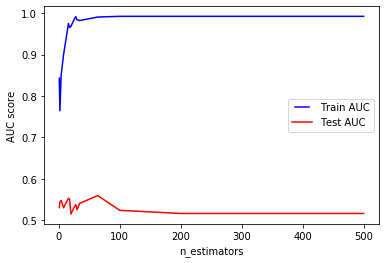

In [43]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
    
def compare_forests(rfs, category, X_train, y_train, X_test, y_test, x_intervals):
    train_results = []
    test_results = []
    for rf in rfs:
        rf.fit(X_train, y_train)
        train_pred = rf.predict(X_train)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_results.append(roc_auc)
        y_pred = rf.predict(X_test)
        #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        #roc_auc = auc(false_positive_rate, true_positive_rate)
        roc_auc = roc_auc_score(y_test_merged, y_pred)
        test_results.append(roc_auc)
    line1, = plt.plot(x_intervals, train_results, 'b', label='Train AUC')
    line2, = plt.plot(x_intervals, test_results, 'r', label='Test AUC')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel(category)
    plt.show()
    

testing_vals = [1, 2, 4, 8, 16, 18, 20, 25, 28, 30, 32, 34, 64, 100, 200, 500]
rfs = [RandomForestClassifier(n_estimators=x, n_jobs=-1) for x in testing_vals]
compare_forests(rfs, 'n_estimators', X_train, y_train_merged, X_test, y_test_merged, testing_vals)

The best values appear to be between 20-30.

We can do the same for max_depth, which determines the number of splits in the tree.

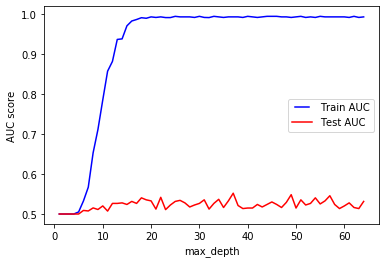

In [44]:
testing_vals = np.linspace(1, 64, 64, endpoint=True)
rfs = [RandomForestClassifier(n_estimators=100, max_depth=x, n_jobs=-1) for x in testing_vals]
compare_forests(rfs, 'max_depth', X_train, y_train_merged, X_test, y_test_merged, testing_vals)

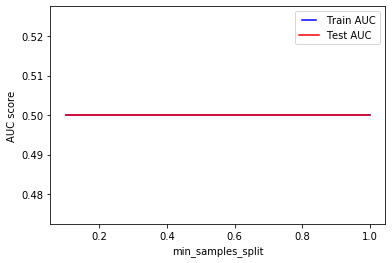

In [45]:
testing_vals = np.linspace(0.1, 1.0, 10, endpoint=True)

rfs = [RandomForestClassifier(n_estimators=100, min_samples_split=x, n_jobs=-1) for x in testing_vals]
compare_forests(rfs, 'min_samples_split', X_train, y_train_merged, X_test, y_test_merged, testing_vals)

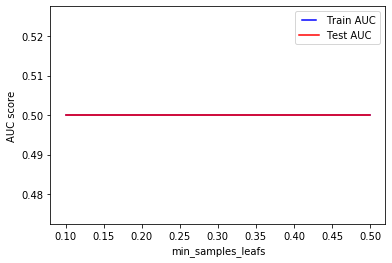

In [46]:
testing_vals = np.linspace(0.1, 0.5, 5, endpoint=True)

rfs = [RandomForestClassifier(n_estimators=100, min_samples_leaf=x, n_jobs=-1) for x in testing_vals]
compare_forests(rfs, 'min_samples_leafs', X_train, y_train_merged, X_test, y_test_merged, testing_vals)

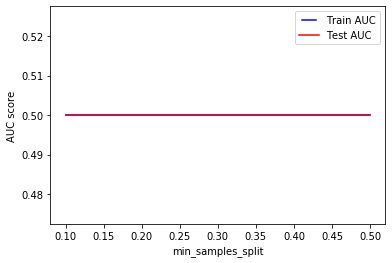

In [47]:
testing_vals = np.linspace(0.1, 0.5, 5, endpoint=True)

rfs = [RandomForestClassifier(n_estimators=100, min_samples_split=x, n_jobs=-1) for x in testing_vals]
compare_forests(rfs, 'min_samples_split', X_train, y_train_merged, X_test, y_test_merged, testing_vals)

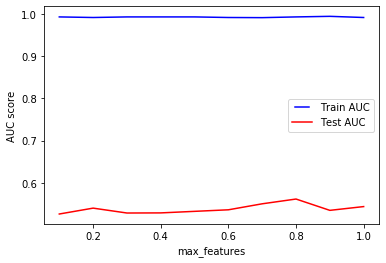

In [48]:
testing_vals = np.linspace(0.1, 1.0, 10, endpoint=True)

rfs = [RandomForestClassifier(n_estimators=100, max_features=x, n_jobs=-1) for x in testing_vals]
compare_forests(rfs, 'max_features', X_train, y_train_merged, X_test, y_test_merged, testing_vals)

In [49]:
# Comparing use of bootstrapping:
for x in [True, False]:
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap=x)
    rf.fit(X_train, y_train_merged)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_merged, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('{}: {}'.format(x, roc_auc))

True: 0.5225563909774436
False: 0.5301691729323308


#### Randomised Search Cross Validation
Instead of looking at curves, we can randomly search through a set of combinations of values.

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# The function to measure the quality of a split.
criterion = ['gini', 'entropy']
# Create the random grid
random_grid = {'class_weight': ['balanced'],
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
pprint(random_grid)

{'bootstrap': [True, False],
 'class_weight': ['balanced'],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000]}


In [51]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train_merged)

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.3min finished


{'n_estimators': 1778,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'entropy',
 'class_weight': 'balanced',
 'bootstrap': True}

In [52]:
def compare_models(clf1, clf2):
    accuracy = clf1.score(X_test, y_test_merged)
    print(accuracy)
    y_pred = clf1.predict(X_test)
    clf1_roc_auc = roc_auc_score(y_test_merged, y_pred)
    print(clf1_roc_auc)

    accuracy = clf2.score(X_test, y_test_merged)
    print(accuracy)
    y_pred = clf2.predict(X_test)
    clf2_roc_auc = roc_auc_score(y_test_merged, y_pred)
    print(clf2_roc_auc)

    print('Improvement of {:0.2f}%.'.format( 100 * \
                                            (clf2_roc_auc - clf1_roc_auc) / clf1_roc_auc))
    
    
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42, 
                                    class_weight='balanced')
base_model.fit(X_train, y_train_merged)
best_random = rf_random.best_estimator_
compare_models(base_model, best_random)

0.8692660550458715
0.5595864661654135
0.8577981651376146
0.5149436090225564
Improvement of -7.98%.


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight': ['balanced'],
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100],
    'max_features': [0.1, 0.2, 0.3, 0.4],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [500, 1000],
    'criterion': ['gini']
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train_merged)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
compare_models(base_model, best_grid)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.3min finished


{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 90, 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.8692660550458715
0.5595864661654135
0.8623853211009175
0.5175751879699249
Improvement of -7.51%.


In [54]:
#sorted(list(zip(X_train, best_grid.feature_importances_.round(decimals=2))), 
#       key=lambda x: x[1])

pred = best_grid.predict(X_test)
pd.crosstab(y_test_merged, pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,373,7
1,53,3


In [55]:
param_grid = {
    'class_weight': ['balanced'],
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100],
    'max_features': [0.1, 0.2, 0.3, 0.4],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [500, 1000],
    'criterion': ['gini']
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
pred = best_grid.predict(X_test)
calc_prec_recall([1,2], y_test, pred)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.9min finished


{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 100, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Recall for selected classes: 32.0 %
Precision for selected classes: 28.999999999999996 %
Naive Precision: 13.0 %



In [56]:
#Confusion Matrix:
pd.crosstab(y_test, pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,2,3,4,5,6,7
Actual Result,,,,,,
1,2,0,3,2,2,1
2,18,0,11,0,11,6
3,3,1,13,1,3,6
4,7,1,74,0,30,2
5,5,0,3,3,16,5
6,12,0,13,2,83,5
7,16,0,4,2,6,64


## XGBoost

In [7]:
from xgboost import XGBClassifier

In [40]:
# Set weights for unbalanced classes as their proportion:
total = sum(y_train.value_counts())
y_weights = y_train.apply(lambda x: (total-y_train.value_counts()[x]) /
                          y_train.value_counts()[x])

# Set weights for unbalanced classes arbitrarily:
weight_dict = {1:20, 2:10, 3:2, 4:2, 5:2, 6:2, 7:2}
y_weights = y_train.map(weight_dict)

In [41]:
model = XGBClassifier(max_depth=6, eval_metric='auc')
model.fit(X_train, y_train, sample_weight=y_weights)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
from sklearn.metrics import accuracy_score

# Calculate Bias
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy: %.2f%%" % (accuracy * 100.0))

# Variance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

calc_prec_recall([1,2], y_test, y_pred)
    
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Training Accuracy: 96.27%
Test Accuracy: 53.90%
Recall for selected classes: 47.0 %
Precision for selected classes: 30.0 %
Naive Precision: 16.0 %



Predicted Result,1,2,3,4,5,6,7
Actual Result,,,,,,,
1,0,3,1,0,1,4,0
2,1,33,0,11,0,12,4
3,0,6,0,9,2,7,2
4,0,14,1,61,1,24,3
5,1,9,1,0,2,11,3
6,1,23,1,14,3,86,3
7,0,18,0,0,1,6,53


In [37]:
sorted(list(zip(X_train, model.feature_importances_.round(decimals=3))), key=lambda x: x[1])

[('verified', 0.003),
 ('source_TwitterforiPad', 0.005),
 ('default_profile_image', 0.006),
 ('source_TwitterforAndroid', 0.007),
 ('source_Facebook', 0.007),
 ('user_lang_en', 0.007),
 ('profile_has_url', 0.008),
 ('source_IFTTT', 0.009),
 ('has_extended_profile', 0.01),
 ('data_source', 0.011),
 ('is_reply', 0.011),
 ('mention_count', 0.011),
 ('default_profile', 0.011),
 ('favourites_count', 0.011),
 ('followers_count', 0.011),
 ('friends_count', 0.011),
 ('listed_count', 0.011),
 ('load_centrality', 0.011),
 ('source_TwitterforiPhone', 0.012),
 ('source_Hootsuite', 0.012),
 ('closeness_centrality', 0.012),
 ('ratio_detected', 0.012),
 ('source_TwitterLite', 0.013),
 ('degree_centrality', 0.013),
 ('lang_en', 0.014),
 ('source_TwitterWebClient', 0.014),
 ('source_TweetDeck', 0.014),
 ('hashtag_count', 0.015),
 ('eigenvector_centrality', 0.015),
 ('ratio_original', 0.015),
 ('statuses_count', 0.015),
 ('tweets_per_hour', 0.015),
 ('betweenness_centrality', 0.016),
 ('geo_enabled', 0.

In [33]:
model = XGBClassifier()
model.fit(X_train, y_train_merged)
y_pred_merged = model.predict(X_test)
accuracy = accuracy_score(y_test_merged, y_pred_merged)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#Confusion Matrix:
pd.crosstab(y_test_merged, y_pred_merged, rownames=['Actual Result'], colnames=['Predicted Result'])


Accuracy: 85.55%


Predicted Result,0,1
Actual Result,,
0,369,5
1,58,4


In [71]:
# CV model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = XGBClassifier()
kfold = KFold(n_splits=3, random_state=7)
results = cross_val_score(model, xVar, yVar, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 54.18% (1.27%)


In [73]:
#Stratified KFold
from sklearn.model_selection import StratifiedKFold

model = XGBClassifier()
kfold = StratifiedKFold(n_splits=3, random_state=7)
results = cross_val_score(model, xVar, yVar, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 53.95% (1.34%)
